In [1]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import seaborn as sns
import os
from PIL import Image

In [2]:
train_dir = 'dataset_new/train'
val_dir = 'dataset_new/test'

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [4]:
num_train = len(train_generator.classes) #4846
batch_size = 64
num_val = len(validation_generator.classes) #218

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
MaxPooling2D(pool_size=(2,2)),

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

C:\Users\musir\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=150,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

Epoch 1/150


C:\Users\musir\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 504ms/step - accuracy: 0.6120 - loss: 0.7026 - val_accuracy: 0.9271 - val_loss: 0.1966
Epoch 2/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8594 - loss: 0.2811 - val_accuracy: 1.0000 - val_loss: 0.0884
Epoch 3/150


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.9031 - loss: 0.2283 - val_accuracy: 0.9531 - val_loss: 0.1616
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2219 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.9460 - loss: 0.1342 - val_accuracy: 0.9427 - val_loss: 0.1356
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 0.0707
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.9620 - loss: 0.1033 - val_accuracy: 0.9375 - val_loss: 0.1262
Epoch 8/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.0971 - val_accuracy: 0.9231 - val_loss: 0.1473
Epoch 9/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.9435 - loss: 0.1378 - val_accuracy: 0.9531 - val_loss: 0.1131
Epoch 10/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0941 - val_accuracy: 1.0000 - val_

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.9982 - loss: 0.0088 - val_accuracy: 0.9896 - val_loss: 0.0350
Epoch 54/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0252
Epoch 55/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.9975 - loss: 0.0103 - val_accuracy: 0.9896 - val_loss: 0.0402
Epoch 56/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 57/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.9740 - val_loss: 0.0984
Epoch 58/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0803 - val_accuracy: 1.0000 - val_loss: 8.7995e-04
Epoch 59/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 0.9979 - loss: 0.0097 - val_accuracy: 0.9844 - val_loss: 0.0489
Epoch 60/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - accuracy: 0.9973 - loss: 0.0054 - val_accuracy: 0.9792 - val_loss: 0.0251
Epoch 104/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3141e-04 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 105/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9948 - val_loss: 0.0075
Epoch 106/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 107/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9948 - val_loss: 0.0046
Epoch 108/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9615 - val_loss: 0.1280
Epoch 109/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9896 - val_loss: 0.0403
Epoch 110/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.2794e-05 - val_ac

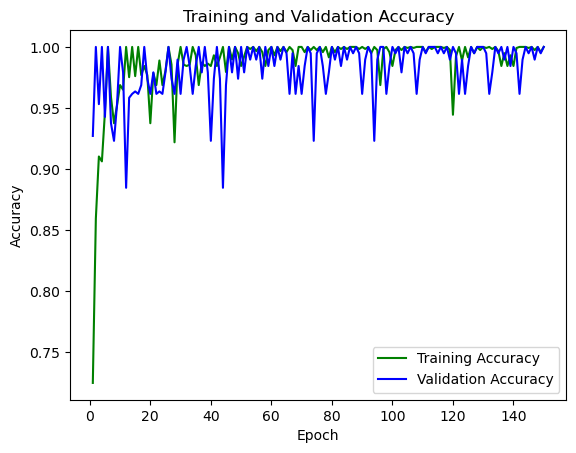

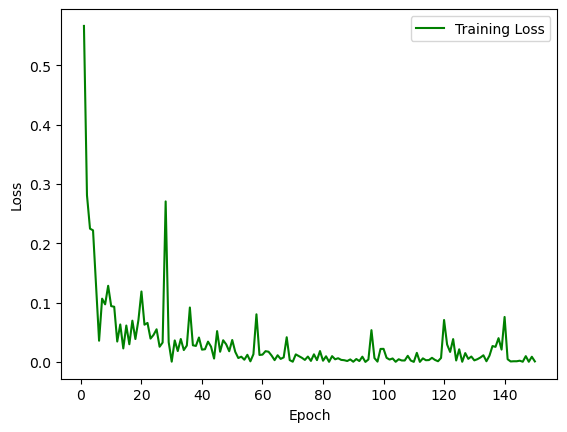

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 151)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
tes_d ='TestSet'
test_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_gen = test_data.flow_from_directory(
        tes_d,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 4232 images belonging to 2 classes.


In [9]:
model.evaluate(test_gen)

67/67 ━━━━━━━━━━━━━━━━━━━━ 33s 493ms/step - accuracy: 0.5620 - loss: 7.9749


[7.939816951751709, 0.5595462918281555]

In [10]:
model.save('driver_model_eye.h5', overwrite=True)